# 80 Cereals Data Analysis

### Data Describtion:

If you like to eat cereal, do yourself a favor and avoid this dataset at all costs.
After seeing these data it will never be the same for me to eat Fruity Pebbles
again.

Problem Statement

• Do an explained data analysis

In [1]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading Dataset
![image-2.png]
1. Data importing and processing

In [2]:
df = pd.read_csv('cereal.csv') 
#Displaying a sample of the dataset to get sn overview of the data structure.
df.head(15)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [3]:
#more information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
#removing rows with negative values in 'sugar' and 'potass'
df = df[(df['sugars']>0) & (df['potass']>0)]

#verifying that the rows are renoved
print(df)

                       name mfr type  calories  protein  fat  sodium  fiber  \
0                 100% Bran   N    C        70        4    1     130   10.0   
1         100% Natural Bran   Q    C       120        3    5      15    2.0   
2                  All-Bran   K    C        70        4    1     260    9.0   
5   Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
6               Apple Jacks   K    C       110        2    0     125    1.0   
..                      ...  ..  ...       ...      ...  ...     ...    ...   
72                  Triples   G    C       110        2    1     250    0.0   
73                     Trix   G    C       110        1    1     140    0.0   
74               Wheat Chex   R    C       100        3    1     230    3.0   
75                 Wheaties   G    C       100        3    1     200    3.0   
76      Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  vitamins  shelf  weight 

In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,110.441176,2.514706,1.088235,174.632353,2.000000,14.764706,7.735294,96.176471,31.250000,2.235294,1.050735,0.822941,39.743161
std,15.875808,1.085765,1.003506,73.053426,2.029631,3.838601,3.972358,67.054876,21.758083,0.812544,0.127224,0.238497,10.846888
min,70.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,20.000000,0.000000,1.000000,1.000000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,140.000000,0.000000,12.000000,3.750000,40.000000,25.000000,2.000000,1.000000,0.670000,31.384493
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.500000,90.000000,25.000000,2.000000,1.000000,0.750000,39.250156
75%,120.000000,3.000000,2.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,46.718044
max,160.000000,6.000000,5.000000,320.000000,10.000000,23.000000,15.000000,320.000000,100.000000,3.000000,1.500000,1.500000,68.402973


In [6]:
missing_values = df.isnull().sum()
print("Missing values :\n",missing_values)

Missing values :
 name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [9]:
df['mfr'].unique()

array(['N', 'Q', 'K', 'G', 'R', 'P', 'A'], dtype=object)

In [10]:
#What are the unique manufacturerers in the dataset
#Creating a dictinary to map the manufacturer codes to their full names
manufacturer_mapping = {
    'A' : 'American Home Food Products',
    'G' : 'General Mills',
    'K' : 'Kelloggs',
    'N' : 'Nabisco',
    'P' : 'Post',
    'Q' : 'Quaker Oats',
    'R' : 'Ralston Purina'
    }
#Repacing the manufacturer codes with the full names in the 'mfr' column
df['mfr'] = df['mfr'].map(manufacturer_mapping)

In [11]:
unique_manufactures = df['mfr'].unique()
print("Uique Manufactures:",unique_manufactures)

Uique Manufactures: ['Nabisco' 'Quaker Oats' 'Kelloggs' 'General Mills' 'Ralston Purina'
 'Post' 'American Home Food Products']


In [12]:
cereal_type_counts = df['type'].value_counts()
print("Cereal Type Distrinution :\n",cereal_type_counts)

Cereal Type Distrinution :
 C    67
H     1
Name: type, dtype: int64


In [13]:
# investigating the summary statistics of numerical features
numerical_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']
numerical_stats = df[numerical_columns].describe()
print("Summary Statistics of Numerical Features:\n", numerical_stats)

Summary Statistics of Numerical Features:
          calories    protein        fat      sodium      fiber      carbo  \
count   68.000000  68.000000  68.000000   68.000000  68.000000  68.000000   
mean   110.441176   2.514706   1.088235  174.632353   2.000000  14.764706   
std     15.875808   1.085765   1.003506   73.053426   2.029631   3.838601   
min     70.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  140.000000   0.000000  12.000000   
50%    110.000000   2.500000   1.000000  180.000000   1.750000  14.500000   
75%    120.000000   3.000000   2.000000  220.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  10.000000  23.000000   

          sugars      potass    vitamins     weight       cups  
count  68.000000   68.000000   68.000000  68.000000  68.000000  
mean    7.735294   96.176471   31.250000   1.050735   0.822941  
std     3.972358   67.054876   21.758083   0.127224   0.238497  
min

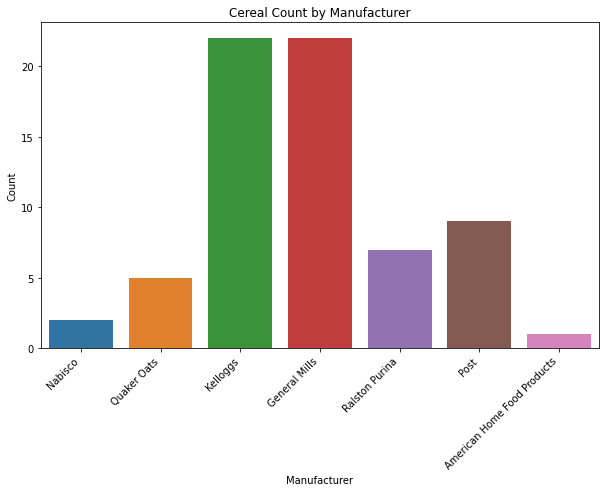

In [14]:
#Creating a bar chart showing the count of cereals by manufactures
#bar chart showing the count od cereals by manufactures
plt.figure(figsize=(10,6))
sns.countplot(x='mfr', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Cereal Count by Manufacturer')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

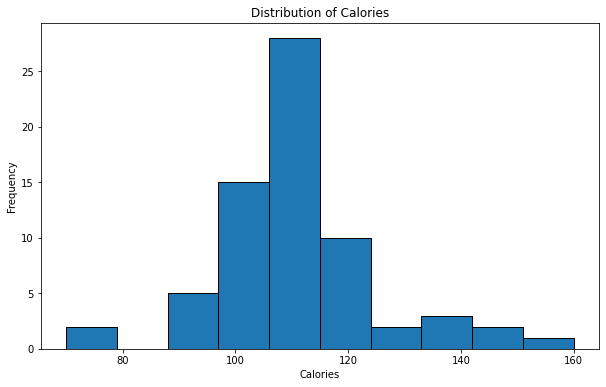

In [15]:
#Histogram for the distribution of calories
plt.figure(figsize=(10,6))
plt.hist(df['calories'], bins=10, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

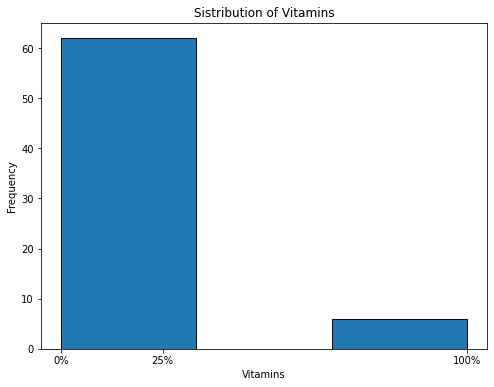

In [16]:
#Summary Statistics of vitamins
vitamins_stats = df['vitamins'].describe()

#Visualization of the distribution of vitamins
plt.figure(figsize =(8,6))
plt.hist(df['vitamins'], bins=3, edgecolor='black')
plt.xlabel('Vitamins')
plt.ylabel('Frequency')
plt.title("Sistribution of Vitamins")
plt.xticks([0,25,100],['0%','25%','100%'])
plt.show()

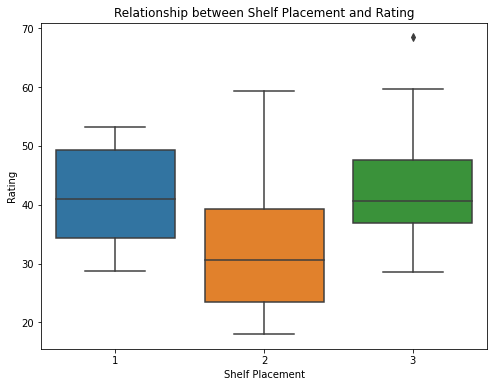

In [17]:
#summary statistics of rating grouped byshelf placement
rating_stats = df.groupby('shelf')['rating'].describe()

#box plot of rating by shelf placement
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='shelf', y='rating')
plt.xlabel('Shelf Placement')
plt.ylabel('Rating')
plt.title('Relationship between Shelf Placement and Rating')
plt.show()

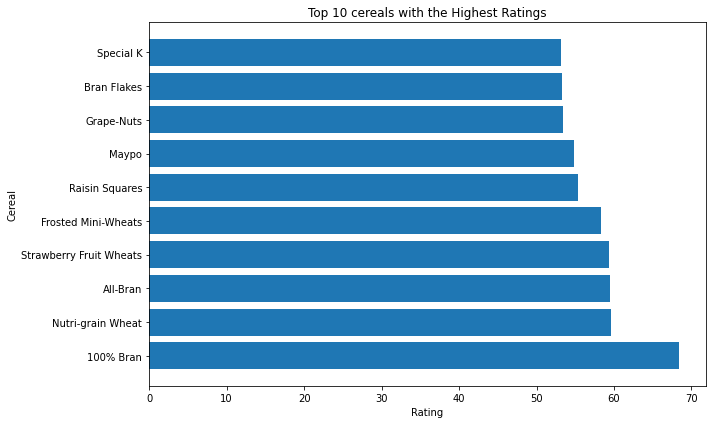

In [19]:
#Select the top 10 cereals with the highest ratings

top_10_cereals = df.nlargest(10, 'rating')

#Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_cereals['name'], top_10_cereals['rating'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Top 10 cereals with the Highest Ratings')
plt.tight_layout()
plt.show()

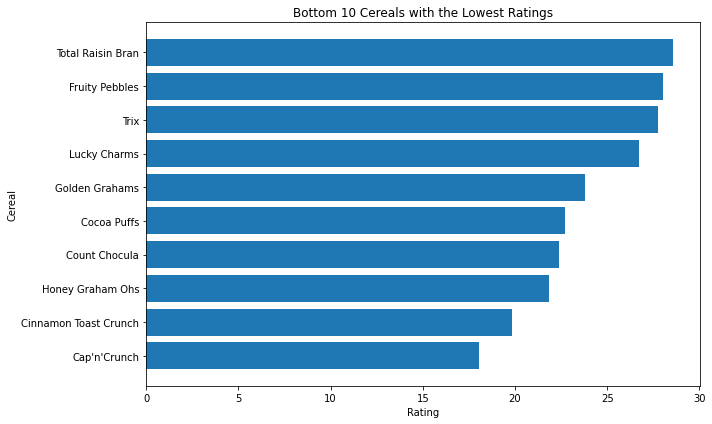

In [20]:
#Select the bottom 10 cereals with the lowest ratings
bottom_10_cereals = df.nsmallest(10, 'rating')

#Create a horizontal bat chart
plt.figure(figsize = (10, 6))
plt.barh(bottom_10_cereals['name'], bottom_10_cereals['rating'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Bottom 10 Cereals with the Lowest Ratings')
plt.tight_layout()
plt.show()

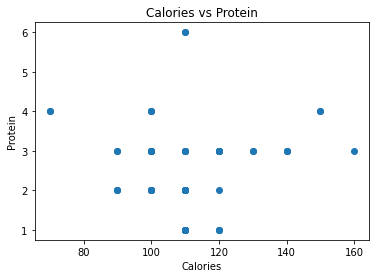

In [21]:
#Scatter plot: Calories vs Protein
plt.scatter(df['calories'], df['protein'])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs Protein')
plt.show()

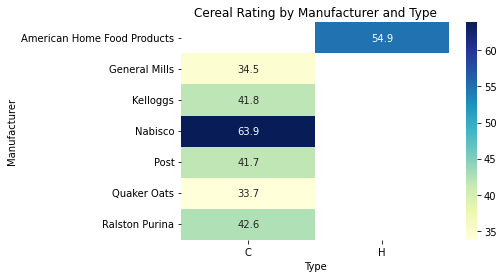

In [22]:
#Create a pivot table with 'mfr' and 'type' as rows and columns, and 'rating' as values
pivot_tabel = df.pivot_table(values='rating', index='mfr', columns='type')

#Create the heatmap using seaborn
sns.heatmap(pivot_tabel,cmap='YlGnBu', annot=True , fmt=".1f")

#Set the plot title and labels
plt.title('Cereal Rating by Manufacturer and Type')
plt.xlabel('Type')
plt.ylabel('Manufacturer')

#Display the heatmap
plt.show()

In [23]:
df['mfr'].unique()

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'General Mills',
       'Ralston Purina', 'Post', 'American Home Food Products'],
      dtype=object)

<Figure size 864x432 with 0 Axes>

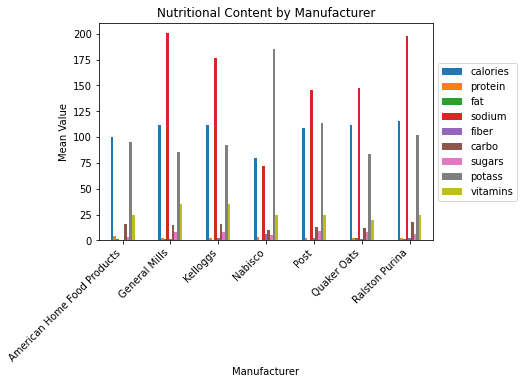

In [26]:
#Grouped bar plot : Nutritional content bt MAnufacturer
nutritional_factors = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass','vitamins']
manufacturer_labels = ['American Home Food Products', 'General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']

#Calculate the mean values for each nutritional factor and manufacturer
mean_values = df.groupby('mfr')[nutritional_factors].mean()

#Create the grouped bar plot
plt.figure(figsize=(12,6))

ax = mean_values.plot(kind = 'bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Value')
plt.title('Nutritional Content by Manufacturer')
ax.legend(nutritional_factors, loc='center left', bbox_to_anchor=(1,0.5)) #Place legend to the right
plt.xticks(range(len(manufacturer_labels)),manufacturer_labels, rotation='horizontal')
plt.xticks(rotation=45, ha='right')
plt.show()

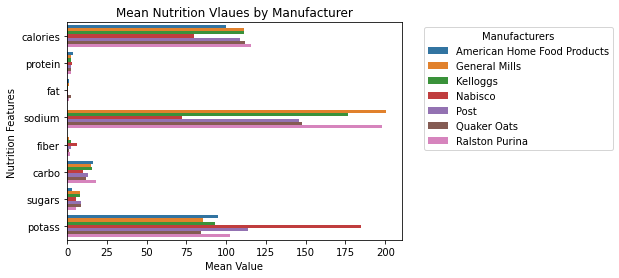

In [27]:
#Select the relevent columns for nutrition features
nutrition_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

#Create a new DAtaFrame with only the nutrition columns
nutrition_data = df[nutrition_cols]

#Group the data by manufacturer and calculate the mean values fro each nutrition feature
mean_nutrition = nutrition_data.groupby(df['mfr']).mean()

#Reset the ndex to have 'mfr' as a column
mean_nutrition.reset_index(inplace=True)

#Melt the DataFrame to covert it into a long format
melted_nutrition = pd.melt(mean_nutrition, id_vars = 'mfr',var_name ='nutrition', value_name ='mean_value')

#Create the bar plot using seaborn
sns.barplot(x='mean_value', y='nutrition', hue='mfr', data=melted_nutrition)

#Set the plot title and labels
plt.title('Mean Nutrition Values by Manufacturer')
plt.xlabel('Mean Value')
plt.ylabel('Nutrition Features')

#Move the legend to the side and set the title
plt.title('Mean Nutrition Vlaues by Manufacturer')
plt.xlabel('Mean Value')
plt.ylabel('Nutrition Features ')

#Move the legend to the side and set the title
plt.legend(title='Manufacturers', bbox_to_anchor=(1.05, 1), loc='upper left')

#Display the plot
plt.show()

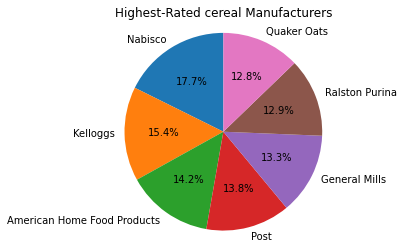

In [29]:
import matplotlib.pyplot as plt

#Get the highest-rated cereals by manufacturer
highest_rating = df.groupby('mfr')['rating'].max().reset_index()

#Sort the data by rating in descending order
highest_rating = highest_rating.sort_values('rating', ascending=False)

#Get the manufacturer names and corresponding ratings
manufacturers = highest_rating['mfr'].tolist()
ratings = highest_rating['rating'].tolist()

#Create a pie chart
plt.pie(ratings, labels=manufacturers,autopct='%1.1f%%', startangle=90)

#Set the title of the pie chart
plt.title("Highest-Rated cereal Manufacturers")

#Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

#Display the pie chart
plt.show()

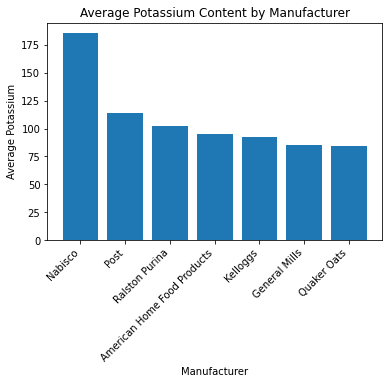

In [30]:
#Calculate the average  potassium for each manufacturer
avg_potassium = df.groupby('mfr')['potass'].mean().reset_index()

#Sort the data by potassium in descending order
avg_potassium = avg_potassium.sort_values('potass', ascending=False)

#Plot the average potassium values
plt.bar(avg_potassium['mfr'], avg_potassium['potass'])

#Add labels an title
plt.xlabel('Manufacturer')
plt.ylabel('Average Potassium')
plt.title('Average Potassium Content by Manufacturer')
plt.xticks(rotation =45, ha='right')

#annotate the highest potassium value if available
nabisco_potassium = avg_potassium.loc[avg_potassium['mfr'] == 'N', 'potass']
if not nabisco_potassium.empty:
    nabisco_potassium = nabisco_potassium.values[0]
    plt.annote('Nabisco',(2, nabisco_potassium), xytext=(2.5. nabisco_potassium+50),arrowprops = dict(facecolor='black', arrowstyle='->'),fontsize=10)

#Display the plot
plt.show()

Insights and findings from the exploratory data analysis of the "80 Cereal" dataset:

Nutritional Content: The EDA revealed variations in the nutritional content of cereals across different manufacturers. Some manufacturers tend to produce cereals with higher levels of certain nutrients, such as protein, fiber, or potassium, while others have lower levels. This suggests that there are significant differences in the nutritional profiles of cereals based on the manufacturer.
Insight: Variation In Sodium Content Among Cereal Manufacturers

A notable observation from the analysis is the relatively high sodium levels across the cereals in the dataset. This finding suggests that individuals should be cautious when considering these cereals as part of their diet, particularly if they are monitoring their sodium intake.

On further examination, it becomes apparent that General Mills, one of the prominent cereal manufacturers, stands out for having the highest sodium content among the different companies. This implies that consumers who are particularly concerned about their sodium consumption may need to exercise caution when selecting General Mills cereals.

Given the potential health implications associated with high sodium intake, it is advisable to refer to dietary guidelines and consult with healthcare professionals to determine an appropriate level of sodium intake for individual dietary needs.

Calories and Nutritional Factors: The analysis examined the relationship between calories and other nutritional factors in cereals. It was found that there is not a correlation between calorie content and factors such as fat, sugar, and carbohydrates. Cereals with certain nutritional components do not appear to be related to high level of calories.
Manufacturer Differences: The EDA highlighted potential differences in nutritional content based on the cereal manufacturer. By comparing the mean values of various nutrients across manufacturers, it was observed that certain manufacturers such as Kellogs and General Mills consistently produce cereals with higher levels of specific nutrients. This suggests that the choice of manufacturer can impact the nutritional composition of cereals.
Limitations and Biases:

Data Availability: The analysis is based on the available dataset, which may have limitations in terms of sample size or representativeness. The dataset may not include all cereals on the market or may not represent the entire population of cereal products. One certain limitation is as the dataset author states: "rating: a rating of the cereals (Possibly from Consumer Reports?)". The "rating" column lacks information about itself(what it stands for).